# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**
* Задача 1 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.

 ---
### Задача 1.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ: Из доказанного ранее (в задаче 3) следует, что оценка $S^2$ не является несмещённой, а оценка $\frac{n}{n-1}S^2$ - является (рассчёты - см. фото).* 

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

In [ ]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])
plt.legend()

**Решение:**

*Будем генерировать выборки и сразу строить для них графики.*

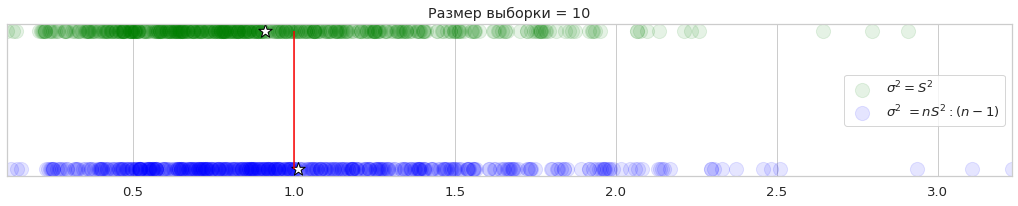

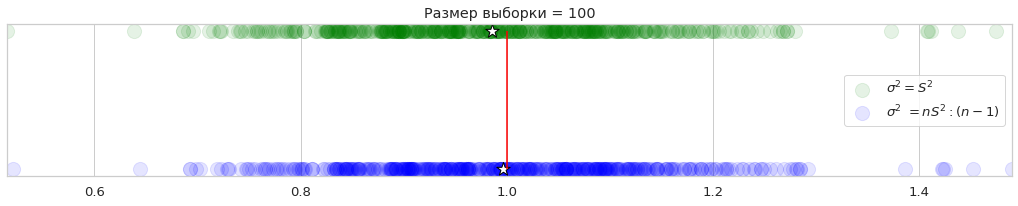

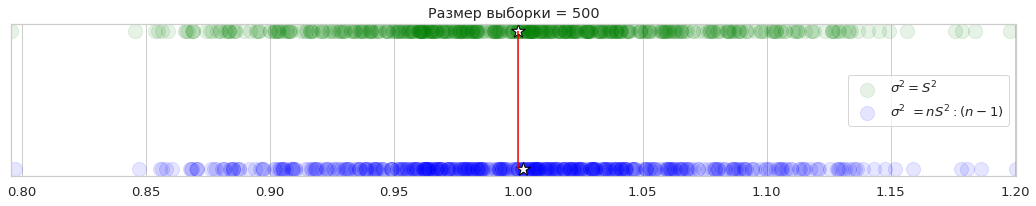

In [ ]:
n_1 = 10
k = 500
ns = np.array([10, 100, 500])

for n in ns:
  sigmas_1 = np.array([])
  sigmas_2 = np.array([])

  #Генерируем выборки
  for i in range(k):
    current_rvs = sps.norm(loc=0, scale=1).rvs(size=n)
    current_a = current_rvs.sum() / n
    current_sigma_sq_1 = ((current_rvs * current_rvs).sum() / n) - (current_a * current_a)
    current_sigma_sq_2 = current_sigma_sq_1 * (n / (n - 1))
    sigmas_1 = np.append(sigmas_1, current_sigma_sq_1)
    sigmas_2 = np.append(sigmas_2, current_sigma_sq_2)

  # Строим график по шаблону
  plt.figure(figsize=(18, 2.8))

  plt.scatter(sigmas_1 , np.zeros(k) + 1, 
              alpha=0.1, s=200, color="green", label="$\sigma^2 = S^{2}$")
  plt.scatter(sigmas_1.mean(), 1, marker='*', s=200, 
              color='w', edgecolors='black')
  
  plt.scatter(sigmas_2, np.zeros(k) , 
              alpha=0.1, s=200, color="blue", label="$\sigma^2$ $ = nS^{2} : (n - 1) $")
  plt.scatter(sigmas_2.mean(), 0, marker='*', s=200, 
              color='w', edgecolors='black')
  
  plt.vlines(1, 0, 1, color='r')
  plt.title(f'Размер выборки = {n}')
  plt.yticks([])
  plt.xlim(min(sigmas_1.min(), sigmas_2.min()), max(sigmas_1.max(), sigmas_2.max()))
  plt.legend(loc='best')

*Видим,  что с ростом размера выборки и смещённая, и несмещённая оценки становятся точнее, но несмещённая делает это "быстрее", т.е. на меньших значениях размера выборки уже начинает показывать лучший результат, чем смещённая.*

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

In [ ]:
n = 500

*Подготовим некоторые вспомогательные матрицы.*

In [ ]:
fracs = np.linspace(1, n, n)
fracs = fracs ** (-1)

fracs_mx = np.array([fracs] * n)
fracs_mx = fracs_mx.reshape(n, n)

fracs_mx_triu = np.triu(fracs_mx)

In [ ]:
coefs = np.linspace(2, n, n - 1)
coefs = coefs / (coefs - 1)
coefs = np.append(np.array([1]), coefs)

coefs_mx = np.array([coefs] * n)
coefs_mx = coefs_mx.reshape(n, n)

*Сгененируем выборкии посчитаем оценки параметров.*

In [ ]:
#Генерируем выборки
rvs_s = np.array([])
for i in range(k):
    current_rvs = sps.norm(loc=0, scale=1).rvs(size=n)
    rvs_s = np.append(rvs_s, current_rvs)

#Считаем оценки параметров
rvs_s = rvs_s.reshape(k, n)
rvs_s_sq = rvs_s * rvs_s

X_s = rvs_s @ fracs_mx_triu
X_sq_s = rvs_s_sq @ fracs_mx_triu

#Смещённые оценки (\sigma = S^2)
S_2 = X_sq_s - (X_s * X_s)
S_2_mean = S_2.mean(axis=0)

#Несмещённые оценки (\sigma = (n * S^2) / (n - 1))
S_2_2 = coefs_mx * S_2
S_2_2_mean = S_2_2.mean(axis=0)

In [ ]:
sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

*Строим график.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, ' $\\widetilde{\\sigma^2}$ ')

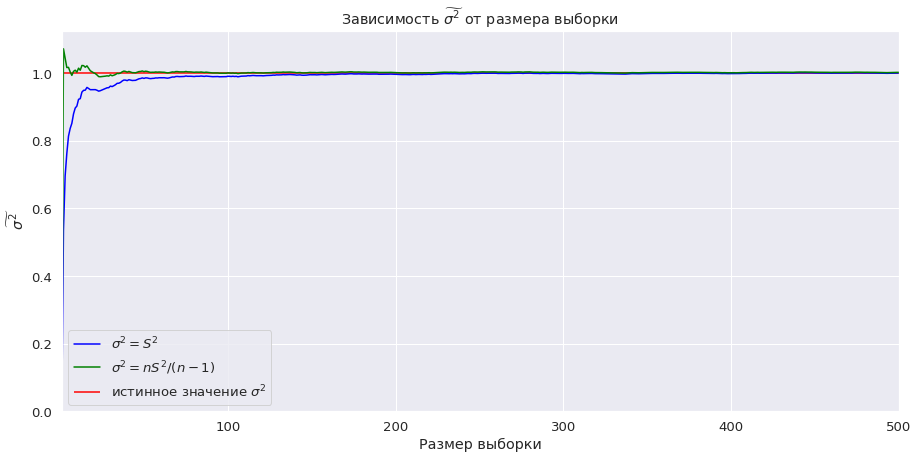

In [ ]:
sns.set(style='darkgrid', font_scale=1.2, palette='Set2')

plt.figure(figsize=(15, 7))
sns.lineplot(np.linspace(1, n, n), S_2_mean, color="blue", label="$\sigma^2 = S^2$")
sns.lineplot(np.linspace(1, n, n), S_2_2_mean, color="green", label="$\sigma^2 = nS^2 / (n - 1)$")
plt.xlim(1, n)
plt.ylim(min(S_2_mean.min(), S_2_2_mean.min()))
plt.title('Зависимость $\widetilde{\sigma^2}$ от размера выборки' )
plt.hlines(1, 0, n, color='red', label="истинное значение $\sigma^2$")
plt.legend(loc='best')
plt.xlabel("Размер выборки")
plt.ylabel(" $\widetilde{\sigma^2}$ ")

*Попробуем посмотреть на меньших значениях $n$.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, ' $\\widetilde{\\sigma^2}$ ')

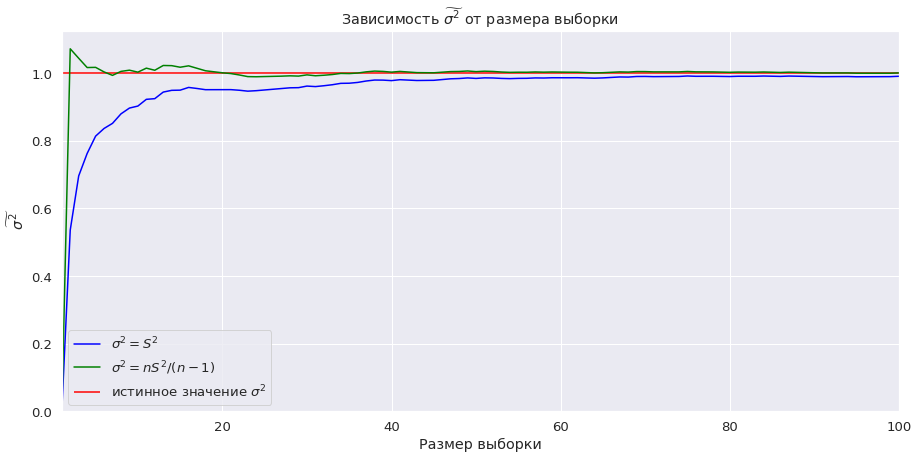

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(np.linspace(1, n, n), S_2_mean, color="blue", label="$\sigma^2 = S^2$")
sns.lineplot(np.linspace(1, n, n), S_2_2_mean, color="green", label="$\sigma^2 = nS^2 / (n - 1)$")
plt.xlim(1, 100)
plt.ylim(min(S_2_mean.min(), S_2_2_mean.min()))
plt.title('Зависимость $\widetilde{\sigma^2}$ от размера выборки' )
plt.hlines(1, 0, n, color='red', label="истинное значение $\sigma^2$")
plt.legend(loc='best')
plt.xlabel("Размер выборки")
plt.ylabel(" $\widetilde{\sigma^2}$ ")

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

*Свойство несмещённости оценки - это свойство того, насколько ошибается оценка "с среднем", т.е. при многократном использовании. На графиках "Зависимость $\widetilde{\sigma^2}$ от размера выборки" видно, что и смещённая, и несмещённая оценки с возрастанием размера выборки становятся все ближе к истинному значению параметра, но несмещённая оценка делает это заметно "быстрее". Для данных оценок эксперименты подтверждают полученное в теоретических оценках свойство смещённости/несмещённости.*

*В лабораторных работах по физике при оценки погрешности используют $n - 1$ в знаменателе при оценке погрешности для того, чтобы эту оценку сделать несмещённой, т.е. избавить её от систематической погрешности.*

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.